<h1 style="text-align: center;">Introduction to Modern Mathematical Modeling with R:</h1>
<h2 style="text-align: center;">A User's Manual to Train Mathematical Consultants<br></h2>

<h3 style="text-align: center;">A Cambridge University Press book</h3>
<h3 style="text-align: center;">by SSP Shen<br><br></h3>

<p style="text-align: center;">Compiled and Edited by Joaquin Stawsky</p>
<p style="text-align: center;">Momtaza Sayd Contributed to this Version of the Code</p>
<p style="text-align: center;">San Diego State University, August 2024</p>

## Chapter 3: Linear Models Using Regression and Data

### A Linear Model for the Life Expectancy in France

In [106]:
#import libaries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import statsmodels.api as sm

In [107]:
dat = pd.read_csv("/Users/momtaza/Desktop/RMathModel/data/LifeExpectancyWorldBank2018clean.csv", encoding='latin-1')
dat.iloc[:3, :5] # first 3 rows and first 5 columns

,Country Name,Country Code,1960,1961,1962
0,Aruba,ABW,65.662,66.074,66.444
1,Afghanistan,AFG,32.292,32.742,33.185
2,Angola,AGO,33.251,33.573,33.914


In [108]:
print(dat.shape)  # dimensions of data frame

(264, 60)


In [109]:
dat.iloc[:5, 54:60]  # data from 1960 to 2017, 58 years

,2012,2013,2014,2015,2016,2017
0,75.299,75.440,75.582,75.725,75.867,NaN
1,62.086,62.494,62.895,63.288,63.673,NaN
2,59.770,60.373,60.858,61.241,61.547,NaN
3,77.389,77.702,77.963,78.174,78.345,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
print(np.where(dat == "France")[0]) # find the index at which "France" exists

[75]


In [111]:
dat.iloc[75:76, :5]

,Country Name,Country Code,1960,1961,1962
75,France,FRA,69.868293,70.117073,70.314634


In [112]:
yr = np.arange(1960, 1990)  # create a sequence of years
le = dat.iloc[75, 2:32].astype(float)
le

1960    69.868293
1961    70.117073
1962    70.314634
1963    70.514634
1964    70.663415
1965    70.812195
1966    70.960976
1967    71.160976
1968    71.309756
1969    71.458537
1970    71.658537
1971    71.907317
1972    72.107317
1973    72.356098
1974    72.604878
1975    72.853659
1976    73.102439
1977    73.351220
1978    73.602439
1979    73.851220
1980    74.051220
1981    74.300000
1982    74.500000
1983    74.800000
1984    75.000000
1985    75.300000
1986    75.600000
1987    75.800000
1988    76.100000
1989    76.348780
Name: 75, dtype: float64

In [113]:
slope, intercept, r_value, p_value, std_err = linregress(yr, le)
print('Linear Regression Model of (tmean ~ yrtime)', end="\n\n")
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("p-value:", p_value)
print("Standard error:", std_err)

Linear Regression Model of (tmean ~ yrtime)

Slope: 0.2232605333681867
Intercept: -367.948736143818
R-squared: 0.9941075368517732
p-value: 9.116707879997709e-33
Standard error: 0.0032483640585422463


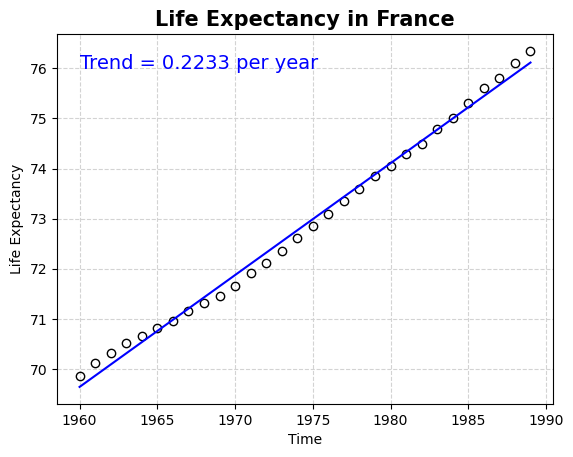

In [114]:
plt.plot(yr, le, 'o', label='Original data', color='k',fillstyle='none')
plt.plot(yr, slope*yr + intercept, 'b', label='Fitted line')
plt.text(1960,76, 'Trend = 0.2233 per year', fontsize=14, color='blue')
plt.xlabel("Time")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy in France",fontweight='bold', fontsize=15)
plt.grid(linestyle="dashed",color="lightgrey")
plt.show()

### Energy Consumption and Heating Degree Data

In [115]:
import os
print(os.getcwd())

/Users/momtaza/Desktop/RMathModel


In [116]:
hdd = np.array([163, 228, 343, 373, 301, 238, 137, 84, 38, 15, 14, 34])
kwh = np.array([593, 676, 1335, 1149, 1127, 892, 538, 289, 172, 131, 134, 134])
slope, intercept, r_value, p_value, std_err = linregress(hdd, kwh)

print('Linear Regression Model of (tmean ~ yrtime)', end="\n\n")
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("p-value:", p_value)
print("Standard error:", std_err)

Linear Regression Model of (tmean ~ yrtime)

Slope: 3.3170456352361266
Intercept: 53.50451582127528
R-squared: 0.966256476946198
p-value: 1.0920692264186638e-08
Standard error: 0.1960200291408819


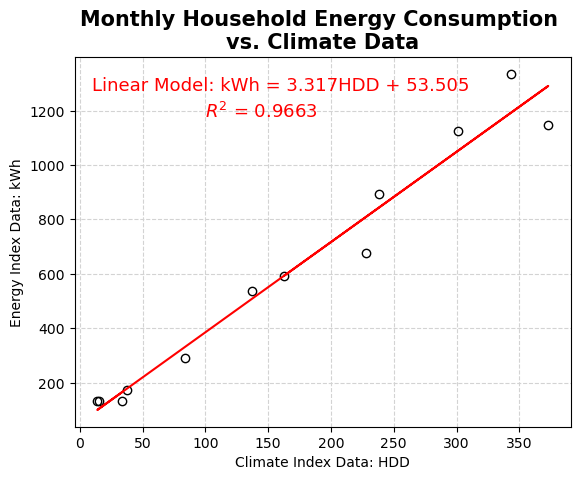

In [117]:
plt.plot(hdd, kwh, 'o', label='Original data', color='k',fillstyle='none')
plt.plot(hdd, slope*hdd + intercept, 'r', label='Fitted line')
plt.xlabel("Climate Index Data: HDD")
plt.ylabel("Energy Index Data: kWh")
plt.title("Monthly Household Energy Consumption \nvs. Climate Data",fontweight='bold', fontsize=15)
plt.text(10,1275, 'Linear Model: kWh = 3.317HDD + 53.505', fontsize=13, color='red')
plt.text(100,1175, '$R^2$ = 0.9663', fontsize=13, color='red')
plt.grid(linestyle="dashed",color="lightgrey")
plt.show()

### An Example of Linear Model and Data Analysis Using R: A Global Warming Dataset

In [118]:
dtmean = pd.read_csv("/Users/momtaza/Desktop/RMathModel/data/gl_land_nohead.txt", header=None,sep='\s+')
dtmean

,0,1,2
0,1880,-0.41,-99.99
1,1881,-0.39,-99.99
2,1882,-0.30,-0.40
3,1883,-0.32,-0.41
4,1884,-0.60,-0.46
...,...,...,...
131,2011,0.79,0.82
132,2012,0.78,0.84
133,2013,0.82,0.85
134,2014,0.88,-99.99


In [119]:
dtmean.shape #shape of dataframe

(136, 3)

In [120]:
yrtime = dtmean[0] #Column 1 is time in Year
tmean = dtmean[1] #Column 2 is mean temp.

tmean.describe()

count    136.000000
mean       0.012426
std        0.401157
min       -0.640000
25%       -0.282500
50%       -0.080000
75%        0.220000
max        0.990000
Name: 1, dtype: float64

In [121]:
yrtime.describe()

count     136.000000
mean     1947.500000
std        39.403892
min      1880.000000
25%      1913.750000
50%      1947.500000
75%      1981.250000
max      2015.000000
Name: 0, dtype: float64

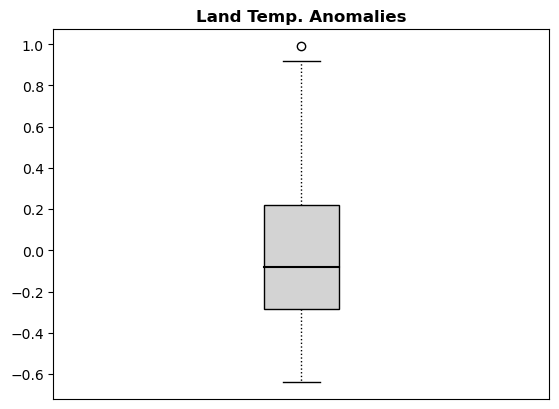

In [122]:
plt.boxplot(tmean, patch_artist=True,
            boxprops = dict(facecolor = 'lightgrey'),
            medianprops = dict(color = "black", linewidth = 1.5),
            whiskerprops = dict(linestyle=':',linewidth=1.0,
                                color='black'))
plt.title("Land Temp. Anomalies",fontweight='bold')
plt.xticks([])
plt.show()

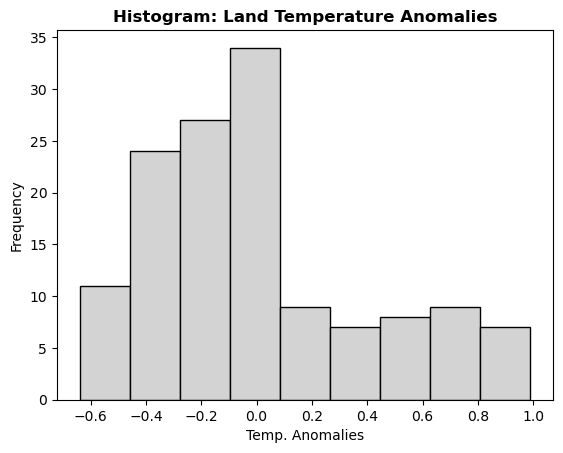

In [123]:
plt.hist(tmean, bins = 9, edgecolor = "black",color="lightgrey")
plt.xlabel('Temp. Anomalies')
plt.ylabel('Frequency')
plt.title('Histogram: Land Temperature Anomalies',fontweight='bold')
plt.show()

In [124]:
print(tmean.to_string())

0     -0.41
1     -0.39
2     -0.30
3     -0.32
4     -0.60
5     -0.46
6     -0.60
7     -0.64
8     -0.44
9     -0.20
10    -0.56
11    -0.59
12    -0.49
13    -0.51
14    -0.41
15    -0.33
16    -0.30
17    -0.22
18    -0.39
19    -0.32
20    -0.15
21    -0.14
22    -0.37
23    -0.43
24    -0.54
25    -0.37
26    -0.26
27    -0.55
28    -0.41
29    -0.43
30    -0.36
31    -0.38
32    -0.36
33    -0.34
34    -0.08
35    -0.07
36    -0.31
37    -0.52
38    -0.43
39    -0.19
40    -0.29
41    -0.17
42    -0.26
43    -0.28
44    -0.23
45    -0.26
46    -0.05
47    -0.19
48    -0.11
49    -0.34
50    -0.16
51    -0.09
52    -0.12
53    -0.24
54    -0.10
55    -0.22
56    -0.09
57    -0.00
58     0.07
59    -0.10
60     0.08
61     0.04
62     0.05
63     0.01
64     0.06
65    -0.08
66    -0.07
67     0.06
68    -0.09
69    -0.13
70    -0.23
71    -0.08
72    -0.02
73     0.07
74    -0.13
75    -0.11
76    -0.22
77     0.04
78     0.05
79     0.04
80    -0.02
81     0.08
82     0.01
83  

In [125]:
print(yrtime.to_string())

0      1880
1      1881
2      1882
3      1883
4      1884
5      1885
6      1886
7      1887
8      1888
9      1889
10     1890
11     1891
12     1892
13     1893
14     1894
15     1895
16     1896
17     1897
18     1898
19     1899
20     1900
21     1901
22     1902
23     1903
24     1904
25     1905
26     1906
27     1907
28     1908
29     1909
30     1910
31     1911
32     1912
33     1913
34     1914
35     1915
36     1916
37     1917
38     1918
39     1919
40     1920
41     1921
42     1922
43     1923
44     1924
45     1925
46     1926
47     1927
48     1928
49     1929
50     1930
51     1931
52     1932
53     1933
54     1934
55     1935
56     1936
57     1937
58     1938
59     1939
60     1940
61     1941
62     1942
63     1943
64     1944
65     1945
66     1946
67     1947
68     1948
69     1949
70     1950
71     1951
72     1952
73     1953
74     1954
75     1955
76     1956
77     1957
78     1958
79     1959
80     1960
81     1961
82     1962
83  

In [126]:
slope, intercept, r_value, p_value, std_err = linregress(yrtime, tmean)



print('Linear Regression Model of (tmean ~ yrtime)', end="\n\n")
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("p-value:", p_value)
print("Standard error:", std_err, end="\n\n\n")

Linear Regression Model of (tmean ~ yrtime)

Slope: 0.009222961690759028
Intercept: -17.949291422164972
R-squared: 0.8207124808669551
p-value: 7.372943495071916e-52
Standard error: 0.00037238957585060764




In [127]:
model = sm.OLS(tmean, sm.add_constant(yrtime)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      1   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     613.4
Date:                Sun, 25 Feb 2024   Prob (F-statistic):           7.37e-52
Time:                        16:36:07   Log-Likelihood:                 48.625
No. Observations:                 136   AIC:                            -93.25
Df Residuals:                     134   BIC:                            -87.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.9493      0.725    -24.745      0.0

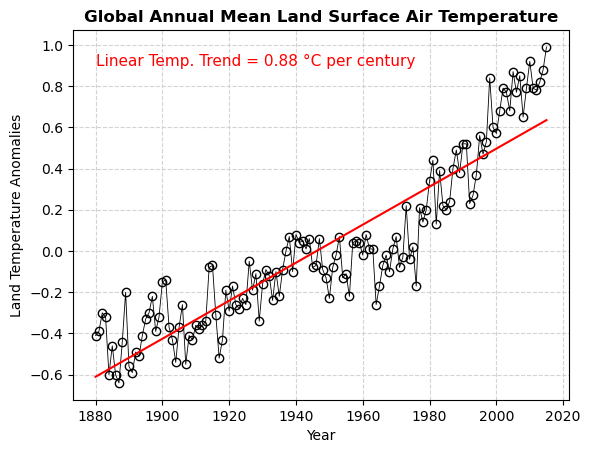

In [128]:
plt.plot(yrtime, tmean, 'o-', color='k',fillstyle='none',linewidth=.6)
plt.plot(yrtime, model.predict(sm.add_constant(yrtime)), 'r')
plt.xlabel("Year")
plt.ylabel("Land Temperature Anomalies")
plt.title("Global Annual Mean Land Surface Air Temperature",fontweight='bold',fontsize=12)
plt.text(1880,.9,"Linear Temp. Trend = 0.88 °C per century",color='red',fontsize=11)
plt.grid(linestyle="dashed",color="lightgrey")
plt.show()

In [129]:
print(model.resid.to_string()) #shows the values of all the residuals

0      0.200123
1      0.210900
2      0.291678
3      0.262455
4     -0.026768
5      0.104009
6     -0.045214
7     -0.094437
8      0.096340
9      0.327117
10    -0.042106
11    -0.081329
12     0.009448
13    -0.019775
14     0.071002
15     0.141779
16     0.162556
17     0.233333
18     0.054110
19     0.114887
20     0.275664
21     0.276441
22     0.037218
23    -0.032005
24    -0.151228
25     0.009549
26     0.110326
27    -0.188897
28    -0.058119
29    -0.087342
30    -0.026565
31    -0.055788
32    -0.045011
33    -0.034234
34     0.216543
35     0.217320
36    -0.031903
37    -0.251126
38    -0.170349
39     0.060428
40    -0.048795
41     0.061982
42    -0.037241
43    -0.066464
44    -0.025687
45    -0.064910
46     0.135867
47    -0.013356
48     0.057421
49    -0.181802
50    -0.011025
51     0.049752
52     0.010529
53    -0.118694
54     0.012084
55    -0.117139
56     0.003638
57     0.084415
58     0.145192
59    -0.034031
60     0.136746
61     0.087523
62     0

In [130]:
#Residual standard error, approximately the SD of residuals
np.std(model.resid)*np.sqrt((135-1)/(135-2))

0.1698685728718706

### Research Level Exploration for Analyzing the Global Warming Data

In [137]:
#Hansen's data analysis
dtmean = pd.read_csv("/Users/momtaza/Desktop/RMathModel/data/gl_land_oceanHansen.txt",sep='\s+')

dtmean.columns.tolist()

['Year', 'Anomaly', 'mean']

In [138]:
dtmean.describe() #statistical summary

,Year,Anomaly,mean
count,135.000000,135.000000,135.000000
mean,1947.000000,0.011852,-2.213259
std,39.115214,0.306782,14.798143
min,1880.000000,-0.470000,-99.990000
25%,1913.500000,-0.210000,-0.235000
50%,1947.000000,-0.080000,-0.060000
75%,1980.500000,0.175000,0.185000
max,2014.000000,0.740000,0.690000


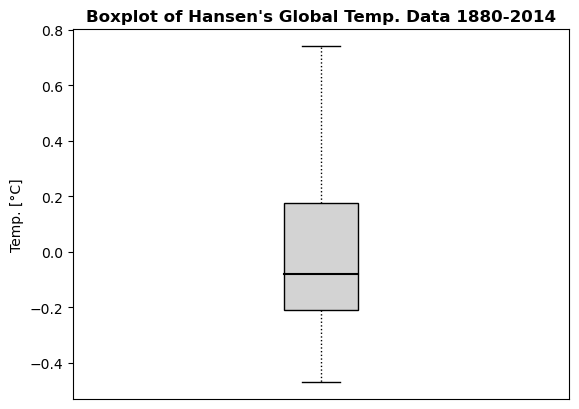

In [139]:
plt.boxplot(dtmean['Anomaly'], patch_artist=True,
            boxprops = dict(facecolor = 'lightgrey'),
           medianprops = dict(color = "black", linewidth = 1.5),
           whiskerprops = dict(linestyle=':',linewidth=1.0,
                               color='black'))
plt.title("Boxplot of Hansen's Global Temp. Data 1880-2014",fontweight='bold')
plt.ylabel("Temp. [°C]")
plt.xticks([])
plt.show()

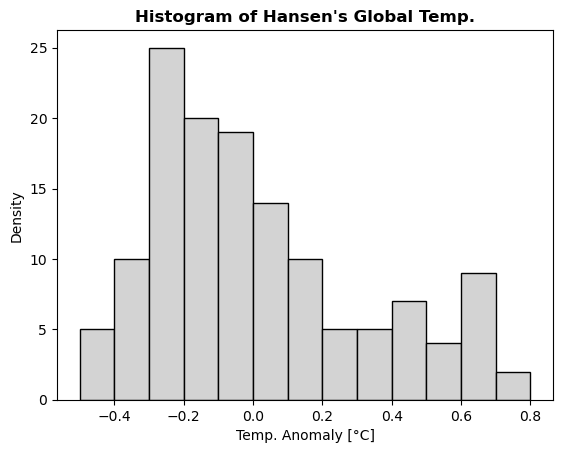

In [140]:
plt.hist(dtmean['Anomaly'], bins=[-0.5 + 0.1*i for i in range(14)],
        edgecolor = "black",color="lightgrey")
plt.title("Histogram of Hansen's Global Temp.",fontweight='bold')
plt.xlabel("Temp. Anomaly [°C]")
plt.ylabel('Density')
plt.show()

In [143]:
# Linear regression models
y18802014 = dtmean['Anomaly']
x18802014 = np.arange(1880, 2015) #not upper boundary inclusive

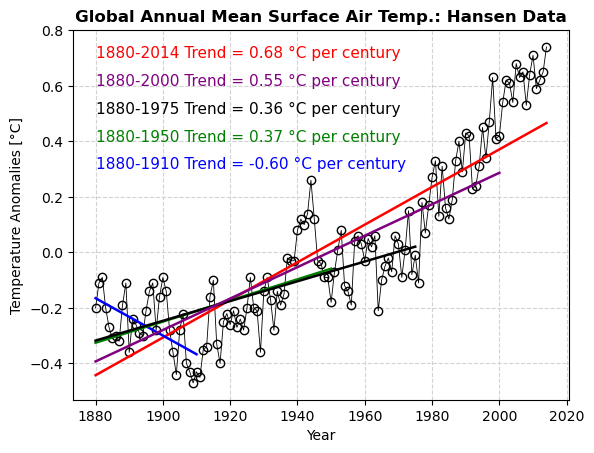

In [150]:
plt.plot(x18802014, y18802014, 'o-', color='k',fillstyle='none',linewidth=.6)

slope, intercept, _, _, _ = linregress(x18802014, y18802014)
plt.plot(x18802014, slope*x18802014 + intercept, 'r', linewidth=1.8)
plt.text(1880,.7,"1880-2014 Trend = 0.68 °C per century",color='red',fontsize=11)

#Linear regression for the first 31 years
y18801910 = dtmean['Anomaly'][1:32]
x18801910 = np.arange(1880, 1911)
slope2, intercept2, _, _, _ = linregress(x18801910, y18801910)
plt.plot(x18801910, slope2*x18801910 + intercept2, 'blue', linewidth=1.8)
plt.text(1880,.3,"1880-1910 Trend = -0.60 °C per century",color='blue',fontsize=11)

#Linear regression for the first 71 years
y18801950 = dtmean['Anomaly'][1:72]
x18801950 = np.arange(1880, 1951)
slope3, intercept3, _, _, _ = linregress(x18801950, y18801950)
plt.plot(x18801950, slope3*x18801950 + intercept3, 'green', linewidth=1.8)
plt.text(1880,.4,"1880-1950 Trend = 0.37 °C per century",color='green',fontsize=11)

#Linear regression for the first 96 years
y18801975 = dtmean['Anomaly'][1:97]
x18801975 = np.arange(1880, 1976)
slope4, intercept4, _, _, _ = linregress(x18801975, y18801975)
plt.plot(x18801975, slope4*x18801975 + intercept4, 'black', linewidth=1.8)
plt.text(1880,.5,"1880-1975 Trend = 0.36 °C per century",color='black',fontsize=11)

#Linear regression for the first 121 years
y18802000 = dtmean['Anomaly'][1:122]
x18802000 = np.arange(1880, 2001)
slope5, intercept5, _, _, _ = linregress(x18802000, y18802000)
plt.plot(x18802000, slope5*x18802000 + intercept5, 'purple', linewidth=1.8)
plt.text(1880,.6,"1880-2000 Trend = 0.55 °C per century",color='purple',fontsize=11)

plt.xlabel("Year")
plt.ylabel("Temperature Anomalies [°C]")
plt.title("Global Annual Mean Surface Air Temp.: Hansen Data",fontweight='bold',fontsize=12)
plt.grid(linestyle="dashed",color="lightgrey")
plt.show()